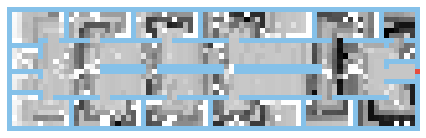

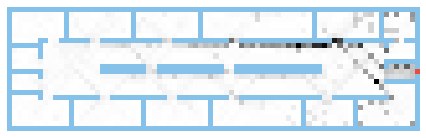

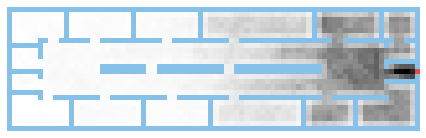

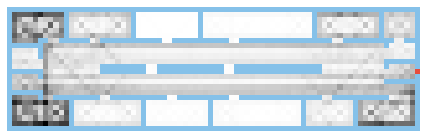

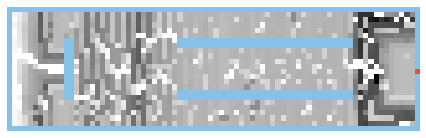

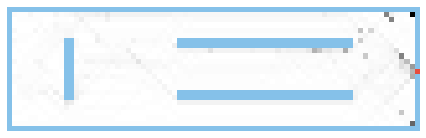

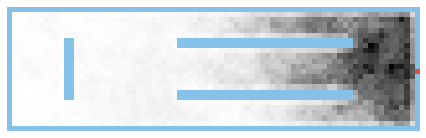

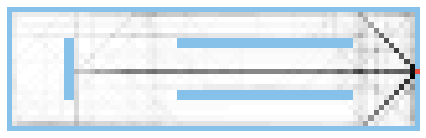

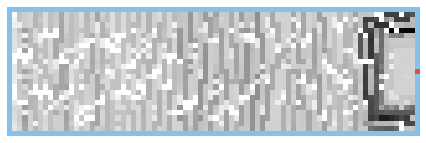

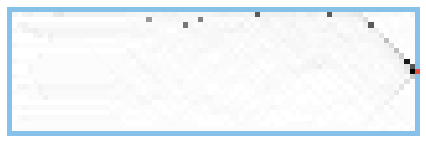

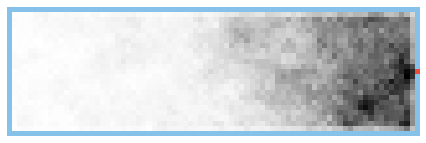

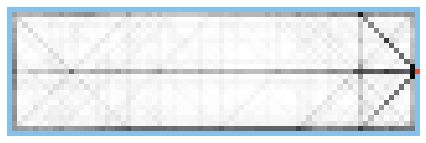

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import AtlasScenarios
%matplotlib inline

with open('AtlasLog_200428014808.json','r') as f:
    log = json.loads(f.read())

for run in log:
    # color cells visited
    data     = np.array(run['heatmap'])
    flat     = data.flatten()
    flat.sort()
    vmax     = flat[-2]
    cmap     = plt.cm.Greys
    norm     = plt.Normalize(0, vmax)
    rgba     = cmap(norm(data))
    
    # color real map
    realMap  = getattr(AtlasScenarios,run['scenarioName'])
    x = 0
    for line in realMap.splitlines():
        if not line.startswith('#'):
            continue
        for (y,c) in enumerate(line):
            if c=='#':
                rgba[x, y, :3] = (133/255,193/255,233/255)
            elif c=='S':
                rgba[x, y, :3] = (231/255, 76/255, 60/255)
        x += 1
    
    (fig,ax) = plt.subplots()
    im       = ax.imshow(rgba, interpolation='nearest')

    fig.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.axis('off')
    fig.savefig('heatmap_{0}_{1}.eps'.format(run['scenarioName'][len('SCENARIO_'):],run['navAlg'][len('Navigation'):]),bbox_inches='tight')
    plt.show()